Sona Davis
# Tutorial 2- Naive Bayes Classification
## Computational Astrobiology

In [8]:
#begin with the standard imports:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_38709/1903555126.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#### Gaussian Naive Bayes
The assumption is that data from each label is drawn from a simple Gaussian distribution. 

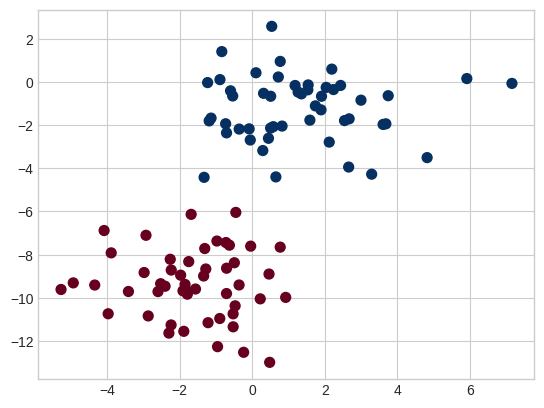

In [11]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

generate some new data and predict the label:

In [17]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plot this new data to get an idea of where the decision boundary is :

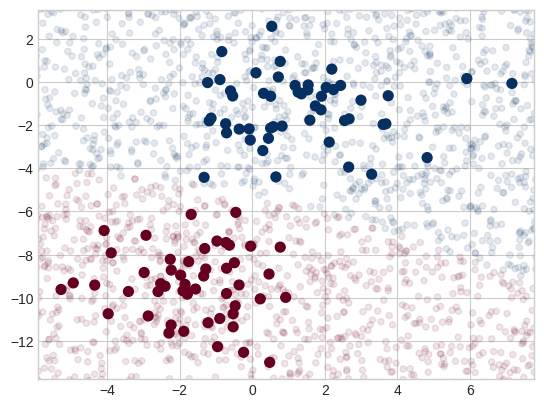

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

A nice aspect of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the predict_proba method:

In [23]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Multinomial Naive Bayes

Example: Classifying Text
Let's download the data and take a look at the target names:

In [28]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

we will select just a few of these categories and download the training and testing sets:

In [31]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

a representative entry from the data:

In [34]:
print(train.data[5][48:])

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [49]:
print(train.data[5][40:])

 McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [40]:
print('\n'.join(train.data[5].split('\n')[10:]))


going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer (introduced in Feature Engineering), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

apply the model to the training data and predict labels for the test data:

In [45]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now we can evaluate them to learn about the performance of the estimator.


#####  Confusion matrix between the true and predicted labels for the test data

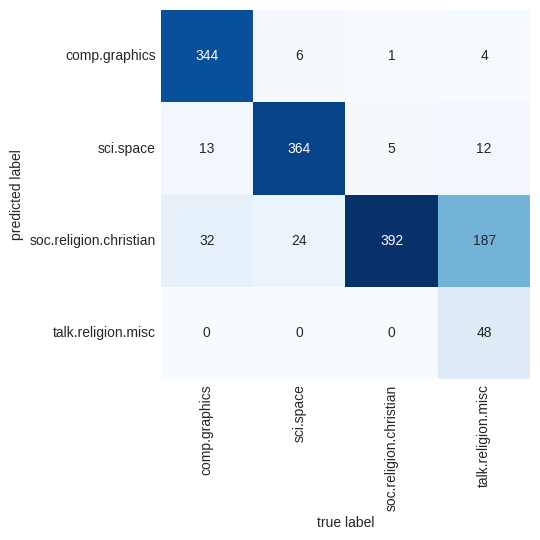

In [53]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

a utility function that will return the prediction for a single string:

In [55]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [58]:
predict_category('sending a payload to the ISS')

'sci.space'

In [60]:
predict_category('discussing the existence of God')

'soc.religion.christian'

In [62]:
predict_category('determining the screen resolution')

'comp.graphics'

### own case of Naive Bayes by using some exoplanet data

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv("/home/user/Documents/Sona-CA/Lifesim/catalog.txt", sep="\t")

# Creating a binary label: habitable if temperature is in range AND has H2O
def is_habitable(row):
    temp = row["T planet (K)"]
    gases = str(row["Gases atmosphere"]).split(",")
    return (250 <= temp <= 320) and ("H2O" in gases)

df["habitable"] = df.apply(is_habitable, axis=1)

# Extract features (you can expand this list)
features = [
    "Diameter (km)",
    "g (m/s^2)",
    "semi-major axis (AU)",
    "T star (K)",
    "Radius star (m)",
    "Mass planet (kg)",
    "T planet (K)"
]

X = df[features]
y = df["habitable"].astype(int)  # Convert True/False to 1/0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[113   5]
 [ 43   1]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       118
           1       0.17      0.02      0.04        44

    accuracy                           0.70       162
   macro avg       0.45      0.49      0.43       162
weighted avg       0.57      0.70      0.61       162



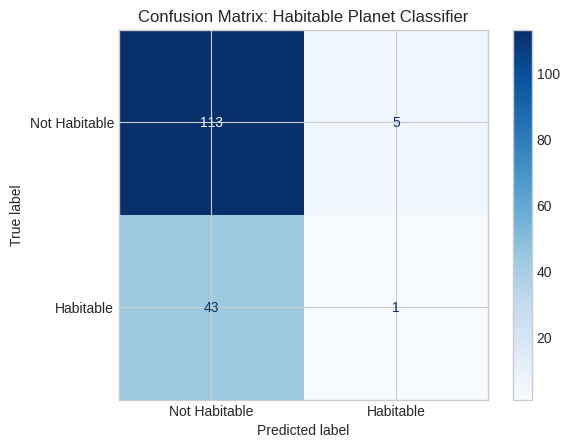

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = [0, 1]  # 0 = Not Habitable, 1 = Habitable

# Plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Habitable", "Habitable"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Habitable Planet Classifier")
plt.show()


Normalized Confusion Matrix

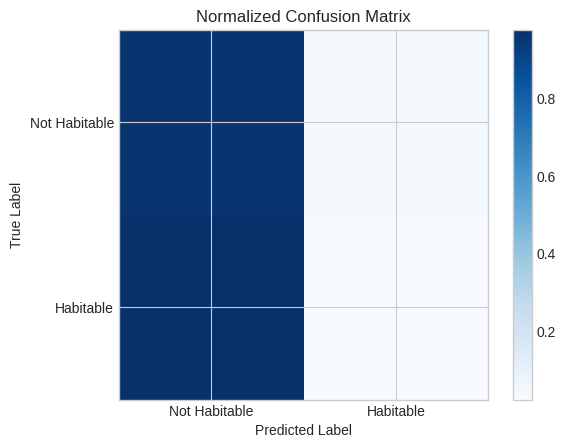

In [70]:
import seaborn as sns  # optional, or use matplotlib
import numpy as np

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized, interpolation='nearest', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Not Habitable", "Habitable"])
plt.yticks([0, 1], ["Not Habitable", "Habitable"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


which features Naive Bayes found most informative

In [79]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

feature_names = X.columns  # if using pandas DataFrame
log_probs = model.feature_log_prob_  # For MultinomialNB
top_features = np.argsort(log_probs[1] - log_probs[0])[-10:]

for i in reversed(top_features):
    print(f"{feature_names[i]}: {log_probs[1][i] - log_probs[0][i]:.2f}")


Mass planet (kg): 0.00
Radius star (m): -0.01
g (m/s^2): -0.01
T star (K): -0.09
Diameter (km): -0.10
semi-major axis (AU): -0.10
T planet (K): -0.15


In [88]:
print("Feature names length:", len(feature_names))
print("Feature log prob shape:", model.feature_log_prob_.shape)
print("Classes:", model.classes_)


Feature names length: 7
Feature log prob shape: (2, 7)
Classes: [0 1]


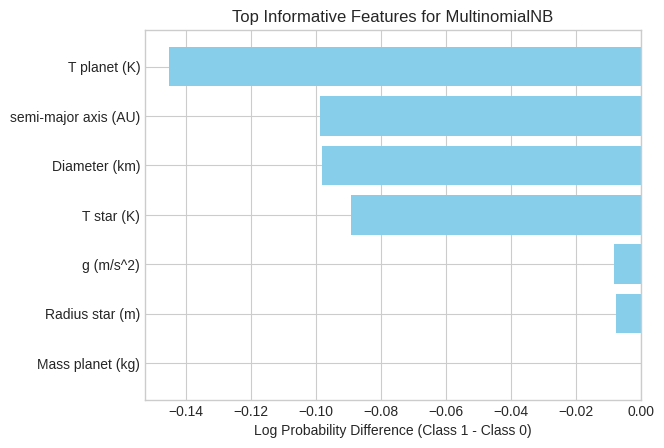

In [90]:
import numpy as np
import matplotlib.pyplot as plt



# Calculate difference in log probabilities between class 1 and class 0
log_prob_diff = model.feature_log_prob_[1] - model.feature_log_prob_[0]

# Take absolute difference for ranking
abs_diff = np.abs(log_prob_diff)

top_n = 7
top_idx = np.argsort(abs_diff)[-top_n:]

top_features = [feature_names[i] for i in top_idx]
top_scores = log_prob_diff[top_idx]

plt.barh(range(top_n), top_scores, color='skyblue')
plt.yticks(range(top_n), top_features)
plt.xlabel("Log Probability Difference (Class 1 - Class 0)")
plt.title("Top Informative Features for MultinomialNB")
plt.show()


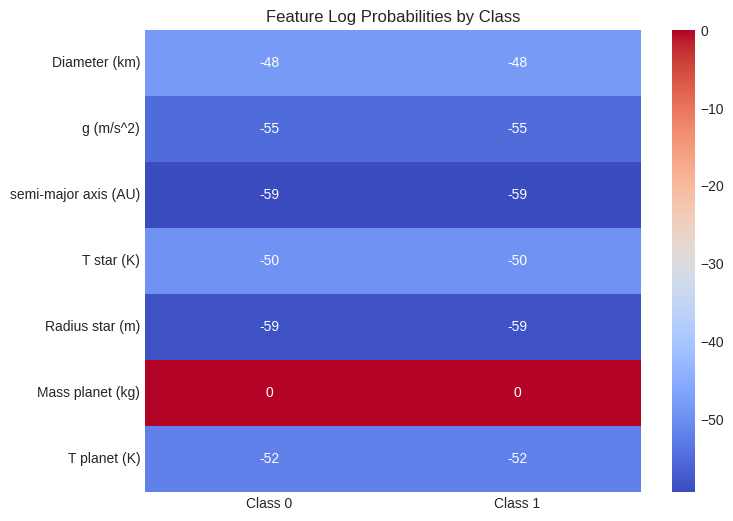

In [92]:
import seaborn as sns
import pandas as pd

# Create dataframe of log probabilities
df_probs = pd.DataFrame(model.feature_log_prob_.T, 
                        index=feature_names, 
                        columns=[f"Class {c}" for c in model.classes_])

plt.figure(figsize=(8,6))
sns.heatmap(df_probs, annot=True, cmap='coolwarm')
plt.title("Feature Log Probabilities by Class")
plt.show()


 pairplot using just most informative features colored by class to see clustering/separation:

/home/user/Lifenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:122: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


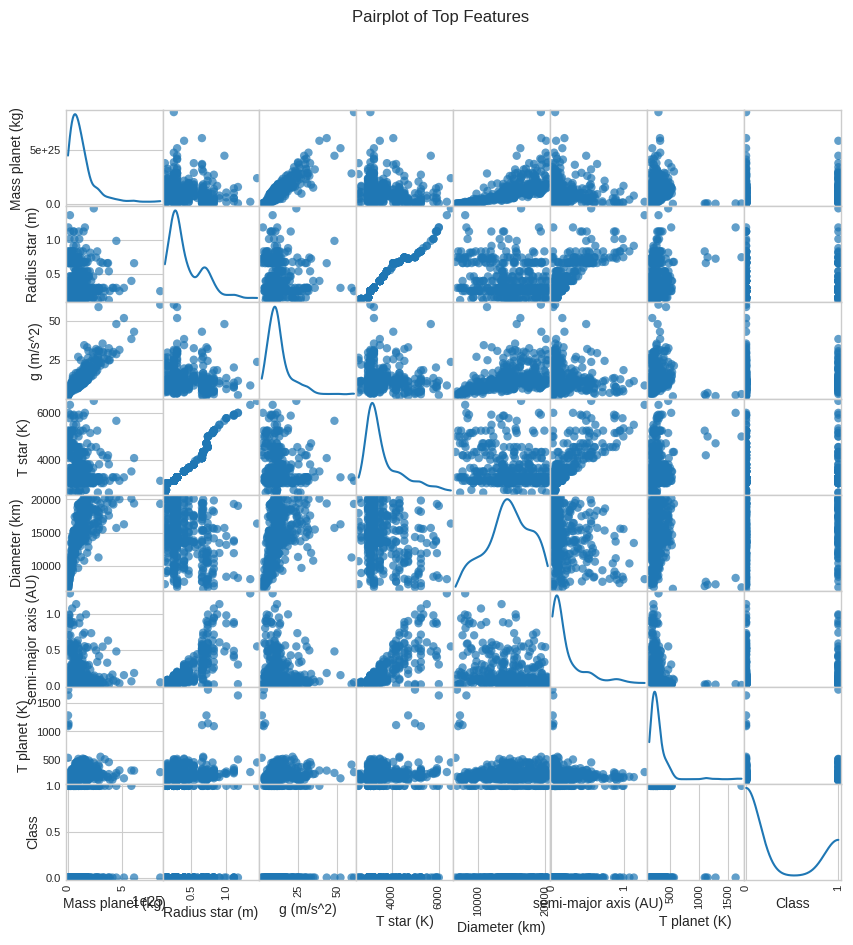

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Make sure X_train is numpy array
X_train = np.array(X_train)
top_idx = list(top_idx)  # convert to list if needed

top_features = [feature_names[i] for i in top_idx]
df_top = pd.DataFrame(X_train[:, top_idx], columns=top_features)
df_top['Class'] = y_train

scatter_matrix(df_top, figsize=(10, 10), diagonal='kde', marker='o', alpha=0.7)
plt.suptitle("Pairplot of Top Features")
plt.show()


Each scatter plot in the matrix shows the relationship between two features.

Each point is a planet, color-coded or labeled by class habitability.

Diagonal plots show the distribution of each individual feature (using kernel density estimate — KDE).